### EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


#### Step-1: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve)

#### Step 2: Load the Dataset

In [4]:
data_path = "C:\\Users\\srira\\Downloads\\Optifyx Technology Internship\\spam.csv"
df = pd.read_csv(data_path, encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

#### Step 3: Data Exploration (EDA)

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.columns

Index(['label', 'message'], dtype='object')

In [8]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Step 4: Data Pre-processing

In [10]:
def label_encoding(label):
    return 1 if label == 'spam' else 0
df['label'] = df['label'].apply(label_encoding)

# Tokenizing text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 5: Data Visualization

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


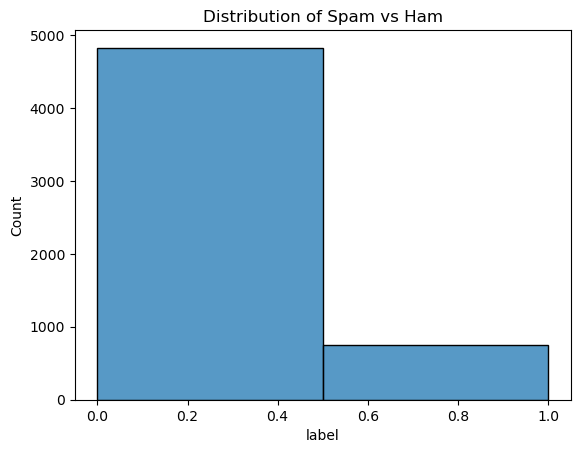

In [11]:
# Histplot
sns.histplot(df['label'], kde=False, bins=2)
plt.title('Distribution of Spam vs Ham')
plt.show()

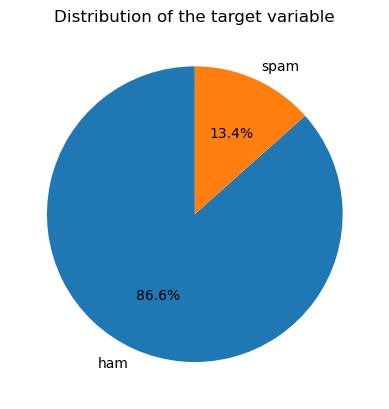

In [12]:
# Pie-Plot
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of the target variable')
plt.show()

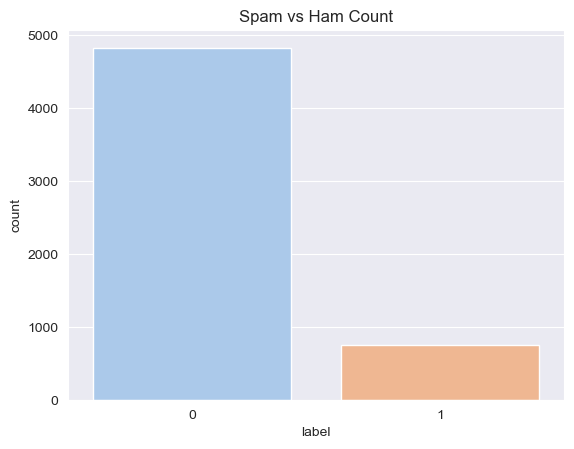

In [23]:
# Bar Plot
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Count')
plt.show()

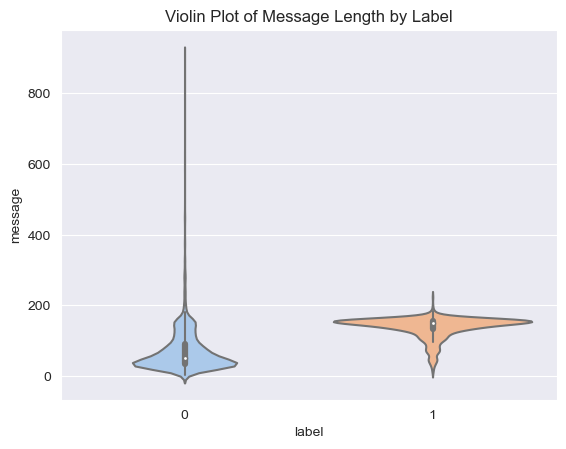

In [24]:
# Violin Plot
sns.violinplot(x='label', y=df['message'].str.len(), data=df)
plt.title('Violin Plot of Message Length by Label')
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the siz

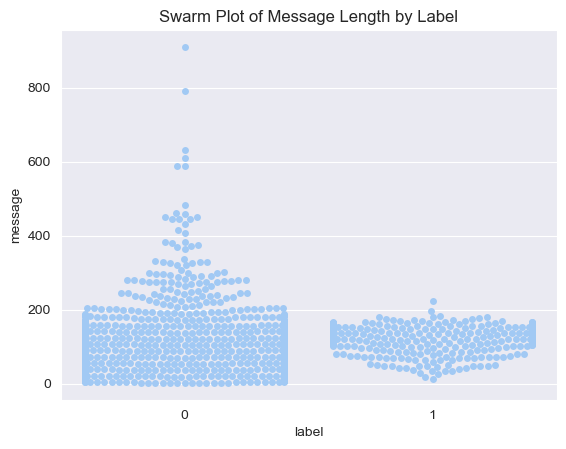

In [25]:
# Swarm Plot
sns.swarmplot(x='label', y=df['message'].str.len(), data=df)
plt.title('Swarm Plot of Message Length by Label')
plt.show()

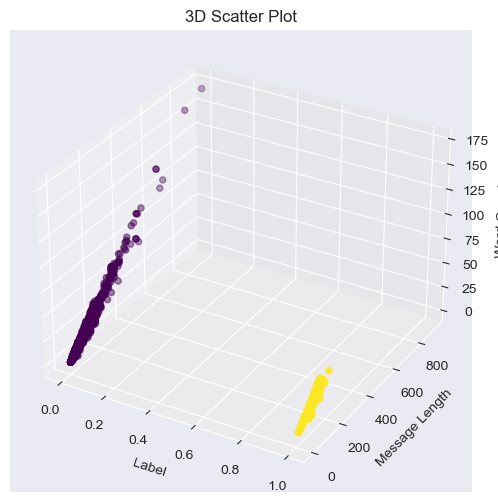

In [27]:
# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['label'], df['message'].str.len(), df['message'].str.split().str.len(), c=df['label'], cmap='viridis')
ax.set_xlabel('Label')
ax.set_ylabel('Message Length')
ax.set_zlabel('Word Count')
plt.title("3D Scatter Plot")
plt.show()

#### Step 6: Define the Models

In [30]:
models = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Machines": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

#### Step 7: Train the Models and Step 8: Evaluate the Models

In [31]:
for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    # Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    print(f"Accuracy: {acc}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC Score: {auc}")


Bernoulli Naive Bayes:
Accuracy: 0.9748878923766816
Confusion Matrix:
[[963   2]
 [ 26 124]]
Precision: 0.9841269841269841
Recall: 0.8266666666666667
F1 Score: 0.898550724637681
AUC-ROC Score: 0.9909119170984456

Multinomial Naive Bayes:
Accuracy: 0.9802690582959641
Confusion Matrix:
[[954  11]
 [ 11 139]]
Precision: 0.9266666666666666
Recall: 0.9266666666666666
F1 Score: 0.9266666666666666
AUC-ROC Score: 0.9870915371329879

Support Vector Machines:
Accuracy: 0.9766816143497757
Confusion Matrix:
[[964   1]
 [ 25 125]]
Precision: 0.9920634920634921
Recall: 0.8333333333333334
F1 Score: 0.9057971014492753
AUC-ROC Score: 0.9812469775474956

Random Forest:
Accuracy: 0.9766816143497757
Confusion Matrix:
[[964   1]
 [ 25 125]]
Precision: 0.9920634920634921
Recall: 0.8333333333333334
F1 Score: 0.9057971014492753
AUC-ROC Score: 0.9834024179620033

Logistic Regression:
Accuracy: 0.9775784753363229
Confusion Matrix:
[[965   0]
 [ 25 125]]
Precision: 1.0
Recall: 0.8333333333333334
F1 Score: 0.909

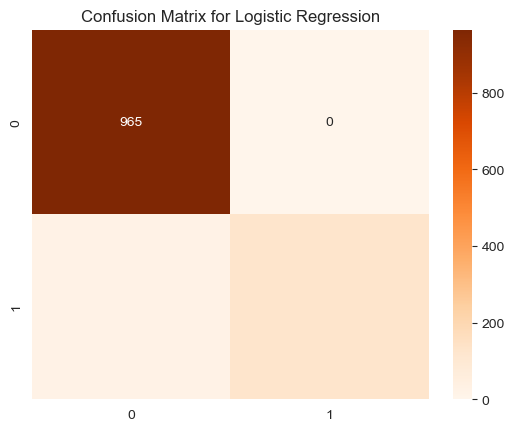

In [35]:
# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title(f"Confusion Matrix for {name}")
plt.show()

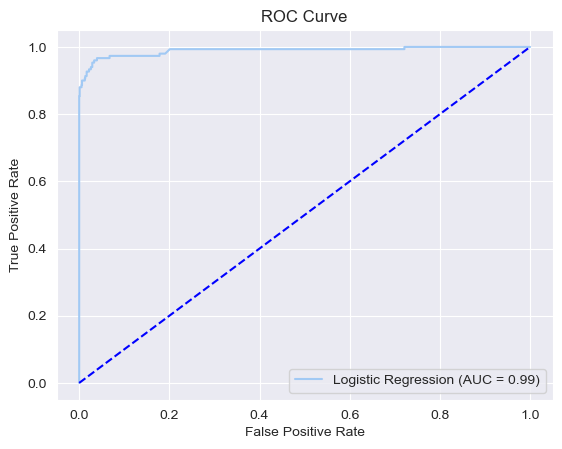

In [37]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='Blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

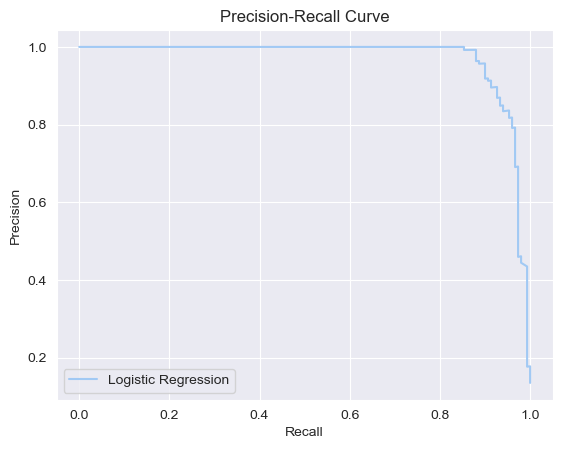

In [38]:
# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall_vals, precision_vals, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()